## 1. import required libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

## 2. Read and Understand the data set

In [10]:
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
# Memeriksa jumlah kolom dan baris dataframe menggunakan shape function
df.shape

(167, 10)

In [12]:
# MEngecek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [13]:
# mengecek statistik deskriptif
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [14]:
# mengecek nama kolom
df.columns

Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')

Insights:

- Data set terdiri dari 167 Negara dimana masing-masing memiliki 10 fitur.
- Tidak ada missing value ataupun duplikat dari dataset
- Referring to data dictionary, exports, health and imports are given as %age of GDP per capita. So lets convert it to actual value

In [15]:
# Memastikan jumlah missing value
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Kita akan mengubah nilai impor, ekspor dan kesehatan dari nilai persentase ke nilai aktual PDB per kapita, karena nilai persentase tidak memberikan gambaran yang jelas tentang negara itu.

Seperti: - Austria dan Belarus memiliki % ekspor yang hampir sama tetapi gdpp mereka memiliki kesenjangan besar dan tidak memberikan gambaran yang akurat tentang negara mana yang lebih maju daripada yang lain. Kemudian kita akan menghapus kolom Negara dan menyimpannya sebagai nama baris dalam dataframe akhir.

In [19]:
# mengubah import, export dan kesehatan dari persentasi menjadi nilai absolut dengan menggunakan kolom GDB/Kapita.

df['Impor'] = df['Impor'] * df['GDPperkapita']/100
df['Ekspor'] = df['Ekspor'] * df['GDPperkapita']/100
df['Kesehatan'] = df['Kesehatan'] * df['GDPperkapita']/100

df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [20]:
# Mengecek shape dari dataframe baru
df.shape

(167, 10)

In [21]:
# memilih numerical columns dan drop negara dan melihat persentil masing-masing data
cols = ['Ekspor', 'Kesehatan', 'Impor', 'Jumlah_fertiliti','GDPperkapita']
df[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,Ekspor,Kesehatan,Impor,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,7420.618847,1056.733204,6588.352108,2.947964,12964.155689
std,17973.885795,1801.408906,14710.810418,1.513848,18328.704809
min,1.076920,12.821200,0.651092,1.150000,231.000000
1%,22.243716,17.009362,104.909640,1.243200,331.620000
25%,447.140000,78.535500,640.215000,1.795000,1330.000000
50%,1777.440000,321.886000,2045.580000,2.410000,4660.000000
75%,7278.000000,976.940000,7719.600000,3.880000,14050.000000
99%,64794.260000,8410.330400,55371.390000,6.563600,79088.000000
max,183750.000000,8663.600000,149100.000000,7.490000,105000.000000


## 3. Exploratory Data Analytics (EDA)

Exploratory Data Analysis (EDA) adalah bagian dari proses data science. EDA menjadi sangat penting sebelum melakukan feature engineering dan modeling karena dalam tahap ini kita harus memahami datanya terlebih dahulu.

In [22]:
# melihat outliers pada persentil 25%,50%,75%,90%,95% dan 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


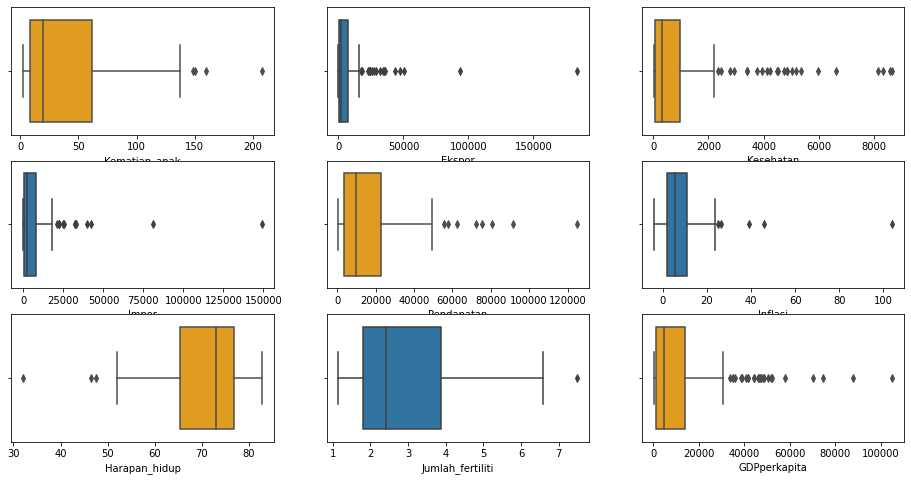

In [66]:
# mengecek outliers dengan boxplot
fig, axs = plt.subplots(3,3, figsize = (16,8))

plt1 = sns.boxplot(df['Kematian_anak'], ax = axs[0,0], color = 'orange')
plt2 = sns.boxplot(df['Ekspor'], ax = axs[0,1])
plt3 = sns.boxplot(df['Kesehatan'], ax = axs[0,2], color = 'orange')
plt4 = sns.boxplot(df['Impor'], ax = axs[1,0])
plt5 = sns.boxplot(df['Pendapatan'], ax = axs[1,1], color = 'orange')
plt6 = sns.boxplot(df['Inflasi'], ax = axs[1,2])
plt7 = sns.boxplot(df['Harapan_hidup'], ax = axs[2,0], color = 'orange')
plt8 = sns.boxplot(df['Jumlah_fertiliti'], ax = axs[2,1])
plt9 = sns.boxplot(df['GDPperkapita'], ax = axs[2,2], color = 'orange')

plt.show()

Insight:

Dari data diatas, kita mendapatkan beberapa Outliers, nanti akan kita lakukan Handling Outliers

----

Pada tahap ini, kita akan coba untuk mengecek daftar 10 negara termiskin dari tiap-tiap fitur yang tersedia dengan menggunakan barplot

In [27]:
df.columns

Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')

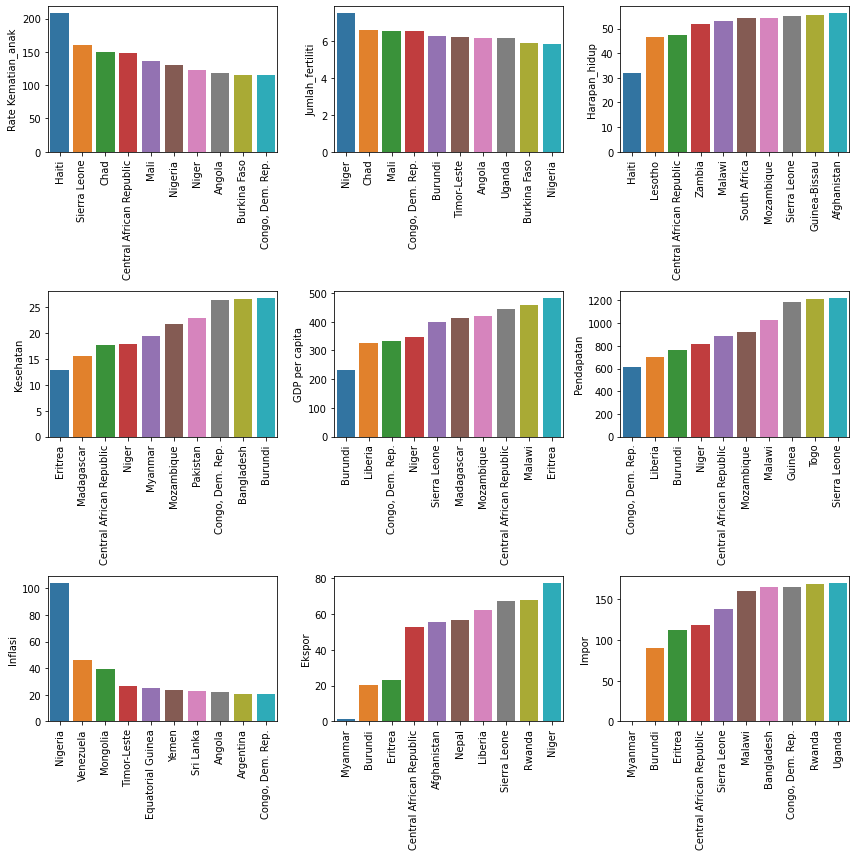

In [30]:
fig, axs = plt.subplots(3,3,figsize = (12,12))

# poor top 10 countries represented as `pt10`

# Child Mortality Rate 
pt10_Kematian_anak = df[['Negara','Kematian_anak']].sort_values('Kematian_anak', ascending = False).head(10)
plt1 = sns.barplot(x='Negara', y='Kematian_anak', data= pt10_Kematian_anak, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Rate Kematian_anak')

# Exports
pt10_Ekspor = df[['Negara','Ekspor']].sort_values('Ekspor', ascending = True).head(10)
plt2 = sns.barplot(x='Negara', y='Ekspor', data= pt10_Ekspor, ax = axs[2,1])
plt2.set(xlabel = '', ylabel= 'Ekspor')

# Health 
pt10_Kesehatan = df[['Negara','Kesehatan']].sort_values('Kesehatan', ascending = True).head(10)
plt3 = sns.barplot(x='Negara', y='Kesehatan', data= pt10_Kesehatan, ax = axs[1,0])
plt3.set(xlabel = '', ylabel= 'Kesehatan')

# Imports
pt10_Impor = df[['Negara','Impor']].sort_values('Impor', ascending = True).head(10)
plt4 = sns.barplot(x='Negara', y='Impor', data= pt10_Impor, ax = axs[2,2])
plt4.set(xlabel = '', ylabel= 'Impor')

# Per capita Income 
pt10_Pendapatan = df[['Negara','Pendapatan']].sort_values('Pendapatan', ascending = True).head(10)
plt5 = sns.barplot(x='Negara', y='Pendapatan', data= pt10_Pendapatan, ax = axs[1,2])
plt5.set(xlabel = '', ylabel= 'Pendapatan')

# Inflation
pt10_Inflasi = df[['Negara','Inflasi']].sort_values('Inflasi', ascending = False).head(10)
plt6 = sns.barplot(x='Negara', y='Inflasi', data= pt10_Inflasi, ax = axs[2,0])
plt6.set(xlabel = '', ylabel= 'Inflasi')

# Fertility Rate
pt10_Jumlah_fertiliti = df[['Negara','Jumlah_fertiliti']].sort_values('Jumlah_fertiliti', ascending = False).head(10)
plt7 = sns.barplot(x='Negara', y='Jumlah_fertiliti', data= pt10_Jumlah_fertiliti, ax = axs[0,1])
plt7.set(xlabel = '', ylabel= 'Jumlah_fertiliti')

# Life Expectancy
pt10_Harapan_hidup = df[['Negara','Harapan_hidup']].sort_values('Harapan_hidup', ascending = True).head(10)
plt8 = sns.barplot(x='Negara', y='Harapan_hidup', data= pt10_Harapan_hidup, ax = axs[0,2])
plt8.set(xlabel = '', ylabel= 'Harapan_hidup')

# The GDP per capita 
pt10_GDPperkapita = df[['Negara','GDPperkapita']].sort_values('GDPperkapita', ascending = True).head(10)
plt9 = sns.barplot(x='Negara', y='GDPperkapita', data= pt10_GDPperkapita, ax = axs[1,1])
plt9.set(xlabel = '', ylabel= 'GDP per capita')


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

Insight:

- Dari data diatas, kita dapat melihat negara-negara yang paling banyak termasuk dalam negara termiskin berdasarkan GDP perkapita, Keatian anak, dan pendapatan adalah: Congo, Dem. Rep., Niger, Sierra Leone,Central African Republic

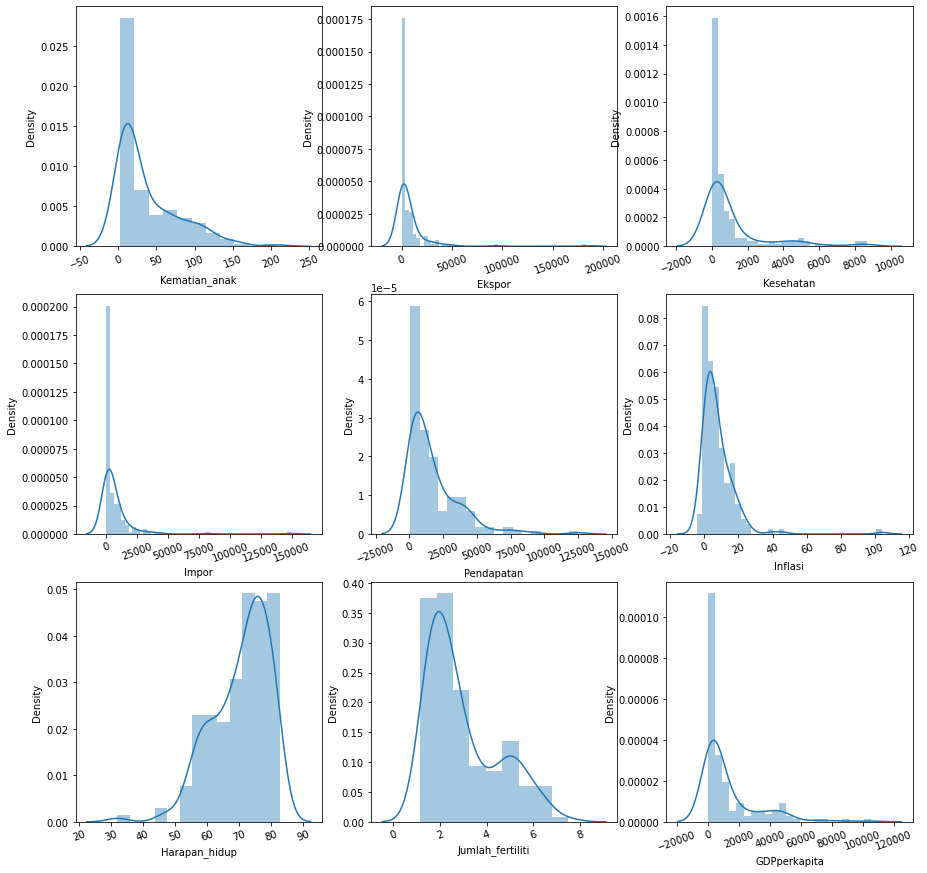

In [31]:
# Plot Ditribusi
plt.figure(figsize=(15, 15))
features = ['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(df[i[1]])
    plt.xticks(rotation=20)

Insights:

- selain harapan hidup, semua kolom terdistribusi miring kekiri

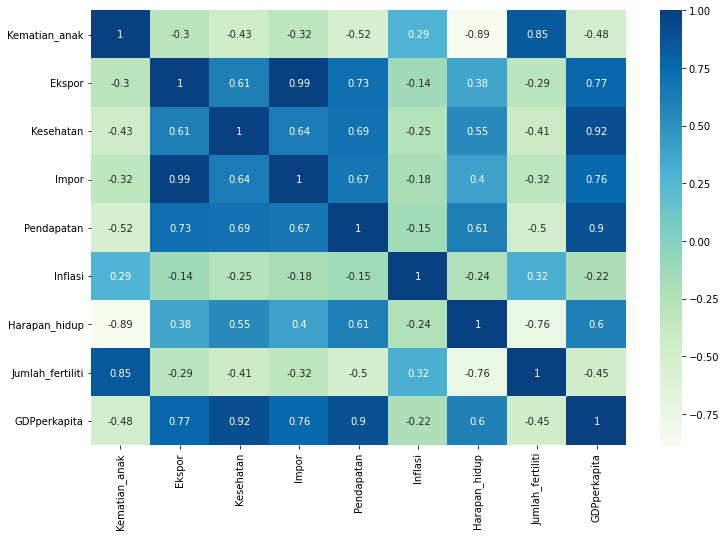

In [59]:
# Melihat korelasi dataset
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(), annot = True, cmap = "GnBu")

Dari plotting diatas, kita dapat mengambil beberapa kesimpulan bahwa terdapat beberapa fitur yang memilihi korelasi tinggi

- GDP per Kapita dan pendapatan memiliki korelasi yang tinggi yaitu 0.9
- Kematian anak dan harapan hidup memiliki korelasi negatif yang tinggi, yaitu sebesar -0.89
- Kematian anak dan jumlah fertilisasi memiliki korelasi yang sangat tinggi, yaitu sebesar 0.85
- Import dan eksport memiliki korelasi yang cukup tinggi, yaitu of 0.74
- Harapan hidup dan jumlah fertilisasi emiliki korelasi negatif yang cukup tinngi, yaitu -0.76
----

**Handling Outliers**
- kematian anak, ekspor dan harapan hidup memiliki outliers dengan level tinggi, jika data diatas persentil 99% kita akan melakukan drop dataset

In [35]:
# Kita drop kolom negara
df1 = df.drop('Negara', axis =1)

In [36]:
# daftar kolom yang memiliki outliers persentil 99%
cols = [ 'Ekspor', 'Kesehatan', 'Impor', 
        'Jumlah_fertiliti', 'GDPperkapita']
df1[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,Ekspor,Kesehatan,Impor,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,7420.618847,1056.733204,6588.352108,2.947964,12964.155689
std,17973.885795,1801.408906,14710.810418,1.513848,18328.704809
min,1.076920,12.821200,0.651092,1.150000,231.000000
1%,22.243716,17.009362,104.909640,1.243200,331.620000
25%,447.140000,78.535500,640.215000,1.795000,1330.000000
50%,1777.440000,321.886000,2045.580000,2.410000,4660.000000
75%,7278.000000,976.940000,7719.600000,3.880000,14050.000000
99%,64794.260000,8410.330400,55371.390000,6.563600,79088.000000
max,183750.000000,8663.600000,149100.000000,7.490000,105000.000000


In [37]:
# kita akan menghandling outliers persentil 99%
cap = 0.99
for col in cols:
    HL = round(df1[col].quantile(cap),2)
    df1[col] = df1[col].apply(lambda x: HL if x>HL else x)

In [38]:
df1[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,Ekspor,Kesehatan,Impor,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,6538.214776,1054.206617,5873.135222,2.942216,12756.826347
std,11415.308590,1790.845323,9422.700869,1.498235,17430.208938
min,1.076920,12.821200,0.651092,1.150000,231.000000
1%,22.243716,17.009362,104.909640,1.243200,331.620000
25%,447.140000,78.535500,640.215000,1.795000,1330.000000
50%,1777.440000,321.886000,2045.580000,2.410000,4660.000000
75%,7278.000000,976.940000,7719.600000,3.880000,14050.000000
99%,55136.308400,8352.982600,46629.102600,6.553400,76125.920000
max,64794.260000,8410.330000,55371.390000,6.560000,79088.000000


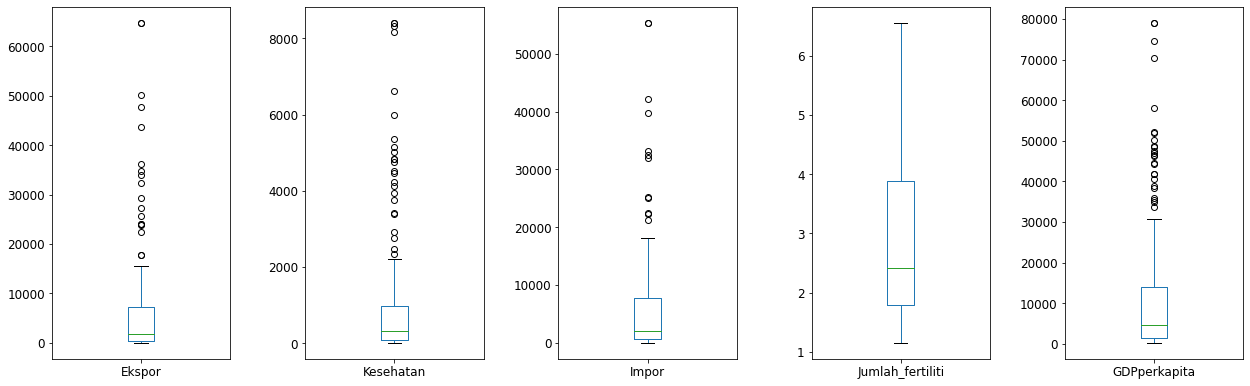

In [39]:
# Cek outliers setelah handling outliers dengan menggunakan boxplot
df1[cols].plot.box(subplots = True, figsize = (18,6), fontsize = 12)
plt.tight_layout(pad=3)
plt.show()

dari data diatas, memang masih ada outliers namun kita masih dapat melanjutkan proses kita

---

## 4. Feature Scaling

In [40]:
# mengecek nama kolom dataset
df1.columns

Index(['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')

In [42]:
# kita akan melakukan sclaling dengan MinMaxScaller
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df1)
df_scaled.shape

(167, 9)

In [43]:
df_scaled

array([[4.26484907e-01, 8.36863963e-04, 3.46486091e-03, ...,
        4.75345168e-01, 8.63216266e-01, 4.08334073e-03],
       [6.81596884e-02, 1.76580780e-02, 3.03749369e-02, ...,
        8.71794872e-01, 9.24214418e-02, 4.89366829e-02],
       [1.20253165e-01, 2.64157894e-02, 2.06204964e-02, ...,
        8.75739645e-01, 3.21626617e-01, 5.36287203e-02],
       ...,
       [1.00778968e-01, 1.45404661e-02, 9.14352123e-03, ...,
        8.08678501e-01, 1.47874307e-01, 1.36829958e-02],
       [2.61441091e-01, 6.04883201e-03, 6.55394371e-03, ...,
        6.98224852e-01, 6.50646950e-01, 1.36829958e-02],
       [3.91918208e-01, 8.32067595e-03, 8.71363183e-03, ...,
        3.92504931e-01, 7.85582255e-01, 1.55851732e-02]])

## 5. Clustering

Pada proses clustering, kita akan menggunakan algoritma K-Means clustering. K-Means adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan tanpa supervisi (unsupervised) dan merupakan salah satu metode yang melakukan pengelompokan data dengan sistem partisi. Metode k-means berusaha mengelompokkan data yang ada ke dalam beberapa kelompok, dimana data dalam satu kelompok mempunyai karakteristik yang sama satu sama lainnya dan mempunyai karakteristik yang berbeda dengan data yang ada di dalam kelompok yang lain. Dengan kata lain, metode ini berusaha untuk meminimalkan variasi antar data yang ada di dalam suatu cluster dan memaksimalkan variasi dengan data yang ada di cluster lainnya.

In [45]:
# Membuat dataframe scaled
df_scaled = pd.DataFrame(df_scaled, columns = df1.columns)

In [46]:
# mengecek dataframe
df_scaled.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,0.426485,0.000837,0.003465,0.004473,0.008047,0.126144,0.475345,0.863216,0.004083
1,0.068160,0.017658,0.030375,0.035887,0.074933,0.080399,0.871795,0.092421,0.048937
2,0.120253,0.026416,0.020620,0.025280,0.098809,0.187691,0.875740,0.321627,0.053629
3,0.566699,0.033925,0.010454,0.027338,0.042535,0.245911,0.552268,0.926063,0.041835
4,0.037488,0.085656,0.086078,0.129764,0.148652,0.052213,0.881657,0.181146,0.151781


In [47]:
df_scaled.shape

(167, 9)

Untuk menentukan nilai k dalam klustering, kita akan menggunakan Elbow method. Elbow method adalah metoda yang sering dipakai untuk menentukan jumlah cluster yang akan digunakan pada k-means clustering. Tujuannya adalah menghitung WCSS se-minimum dengan jumlah cluster yang kecil agar bisa dilakukan interpretasi data.

In [48]:
num_clusers = list(range(1,11))
ssd = []
for clustuer in num_clusers:
    kmeans = KMeans(n_clusters=clustuer, max_iter= 50)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)

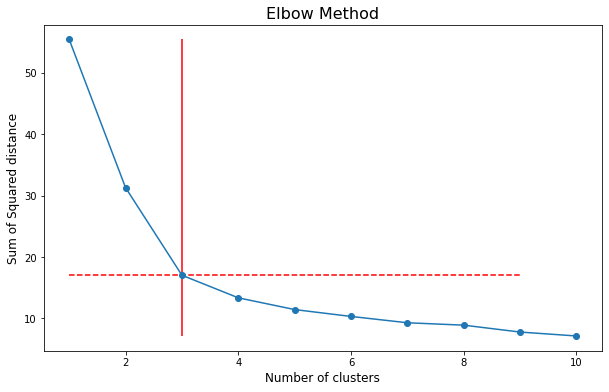

In [49]:
# Plotting metode elbow
plt.figure(figsize=(10,6))
plt.plot(num_clusers,ssd, marker = 'o')
plt.title('Elbow Method', fontsize = 16)
plt.xlabel('Number of clusters',fontsize=12)
plt.ylabel('Sum of Squared distance',fontsize=12)
plt.vlines(x=3, ymax=ssd[-1], ymin=ssd[0], colors="r", linestyles="-")
plt.hlines(y=ssd[2], xmax=9, xmin=1, colors="r", linestyles="--")

plt.show()

Berdasarkan elbow method, kita dapat menggunakan nilai k=3

In [50]:
# K-Mean dengan nilai k =3
kmeans = KMeans(n_clusters = 3, max_iter = 50, random_state= 50)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [51]:
# menambahkan kolom dengan nilai hasil klustering
df_country = df.copy()
df_country['KMean_clusterid']= pd.Series(kmeans.labels_)
df_country.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,KMean_clusterid
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [52]:
# kita akan melihat nilai masing-masing value
df_country.KMean_clusterid.value_counts()

0    93
2    46
1    28
Name: KMean_clusterid, dtype: int64

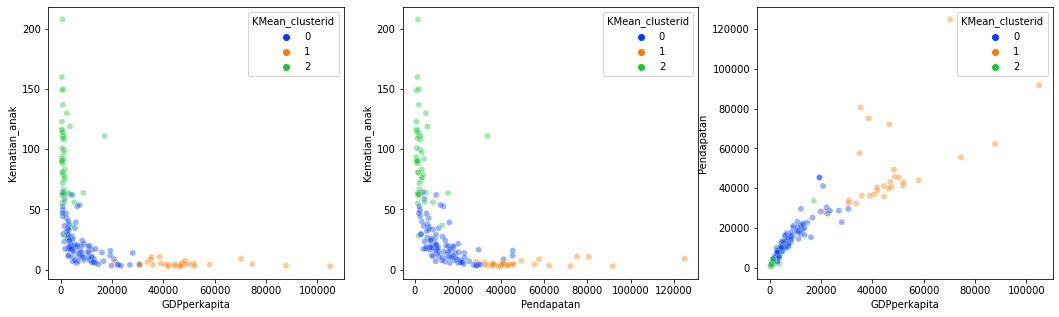

In [53]:
# Kita akan melakukan beberapa visualisasi dengan scatter plot menggunakan kolom dari dataset dengan korelasi yang tinggi

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='GDPperkapita', y='Kematian_anak', hue='KMean_clusterid', data=df_country, palette="bright", alpha=.4)

plt.subplot(1, 3, 2)
sns.scatterplot(x='Pendapatan', y='Kematian_anak', hue='KMean_clusterid',data=df_country, palette="bright", alpha=.4)

plt.subplot(1, 3, 3)
sns.scatterplot(x='GDPperkapita', y='Pendapatan', hue='KMean_clusterid', data=df_country, palette="bright", alpha=.4)

plt.show()

In [56]:
# kita cek rata-rata mean
df_country_analysis = df_country.groupby(['KMean_clusterid']).mean().sort_values(['Kematian_anak','Pendapatan','GDPperkapita'],ascending = [False,True,True])
df_country_analysis

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
KMean_clusterid,,,,,,,,,
2,93.284783,811.834109,94.207885,748.806761,3516.804348,12.097065,59.393478,5.090217,1695.913043
0,21.061290,3578.798694,548.175402,3687.127861,13939.677419,7.082688,73.078495,2.245806,7954.860215
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714


berdasarkan nilai mean yang kita peroleh, didapatkan hasil klustering

- cluster 0 : Negara Berkembang
- Cluster 1: Negara Maju
- Cluste 2: Negara Tertinggal
---

Berdasarkan hasil klustering kita bisa mendapatkan daftar 46 negara yang termasuk dalam katagori teringgal

In [61]:
Negara_tertinggal = df_country[df_country['KMean_clusterid']== 2]
Negara_tertinggal

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,KMean_clusterid
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,2
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,2


Selanjutnya, kita akan memilih 5 negara paling tertinggal berdasarkan GDPperkapita, pendapatan, dan tingkat kematian anak

In [57]:
# Memilih 5 negara paling tertinggal berdasarkan GDPperkapita, pendapatan, dan tingkat kematian anak
K_cluster_Undeveloped = df_country[df_country['KMean_clusterid']== 2]
K_top5 = K_cluster_Undeveloped.sort_values(by = ['GDPperkapita','Pendapatan','Kematian_anak'],
                                                     ascending=[True, True, False]).head(5)

print( '5 Negara paling membutuhkan bantuan:' , K_top5['Negara'].values )

Top 5 countries dire need of aid  based on K cluster are: ['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']


In [62]:
#Rincian 5 negara paling membutuhkan bantuan
K_top5

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,KMean_clusterid
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
